# Finding a Neighbourhood to Call Home

This notebook forms the basis for my Data Science Capstone Project - Reid J.C., 2020-06-30

---

### Table of Contents:

  1. Introduction
  2. Data
  3. Methodology
  4. Results
  5. Discussion
  6. Conclusion
  
---

## 1. Introduction: 

### 1.1 Background

A young couple have finished school and have been saving money while living in a small apartment. The couple is looking to move to the western edge of Lake Ontario, because they know they don't want to live in the heart of Toronto, and they also have family in the GTHA (Greater Toronto and Hamilton Area). They're looking into buying a house but are overwhelmed due to the significant number of important factors required to narrow down the regions that they should invest their time and energy into to explore further. As a young couple, they are interested in the notion of future kids being able to walk to school, as well as nearby daycare centres being available since both adults are employed. The couple is also highly interested in being able to enjoy their local neighbourhood's outdoor and recreational activities, but they find it difficult to explore this in a time-efficient manner and have so far been overwhelmed looking at city directories and Google Maps.

### 1.2 Problem Description

Purchasing a house is a significant investment, and there are many big decisions to make and many unknowns to uncover prior to signing a mortgage.
   * What city should they live in?
   * What is the composition of each city?
   * Where are the neighbourhoods within each city?
   * What types of neighbourhoods offer the amenities they are interested in?
   * Which neighbourhoods are similar to each other?

The couple is looking for a potential neighbourhod to move into that will continue to provide local activities for them and potential future kids and looking into neighbourhoods within west Hamilton, Burlington, Oakville, and Mississauga. The couple want daycare and elementary schools to be local, as well as a high diversity of outdoor and athletic facilities. The couple have a lot of outdoor facilities and athletic facilities in mind that they are interested in, including:
   * Playground			   
   * Bike Trail			   
   * Beach			    	
   * Botanical Garden		
   * Dog Run				 
   * Fishing Spot			
   * Lake			    	 
   * Nature Preserve		   
   * Park					 
   * Pool		 
   * Boxing Gym			  
   * Climbing Gym			
   * Cycle Studio			 	
   * Gyms					  
   * Martial Arts Dojo	    
   * Outdoor Gym			
   * Pilates Studio		   
   * Track				    
   * Yoga Studio			 
   * Indoor Play Area		
   * Recreation Center	

A search of this magnitude (e.g. 4 cities and many neighbourhoods within them, across so many different types of amenities, and factoring in geolocation) would take up an extraordinary amount of time to individually search per neighbourhood and manually comb the results (i.e. Google searches). Therefore, the couple are looking for a data science approach that could help them pinpoint the neighbourhoods that offer the amenities they are interested in, as well as the neighbourhoods based on the diversity and quantity of amenities offered. Furthermore, the couple is interested in knowing generally which neighbourhoods are more and less similar to each other based on these amenities.

### 1.3 Target Audience

This problem is relevant to other couples and young adults in similar stages of life, who for personal reasons are interested in the communities to the west of Toronto, Ontario, Canada. However, this type of analysis could be adapted by anyone looking to find a desirable neighbourhood, by adapting he search criteria to suit their own personal preferences.

---

## 2. Data

### 2.1 Neighbourhood names and geolocations 
Unfortunately, the Wikipedia page for the neighbourhood and postal code information for this region is incompletely annotated;
https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_L. However, the following database,
https://www.postalpinzipcodes.com/Postcode-CAN-Canada-Postal-code-L9K-ZIP-Code, is available to curate this information for the following cities: Hamilton (west), Burlington, Oakville, and Mississauga. Conveniently, neighbourhoods are grouped by postal code so as to have roughly even neighbourhood areas. Two small postal code areas were joined (i.e. Burlington Central and Maple regions) into one neighbourhood, since they are both relatively small territories. The neighbourhood of Malton was excluded from Mississauga due to the highly urban location of this neighbourhood and proximity to the airport. After preprocessing the data using the aforementioned descriptions, 35 distinct neighbourhoods were assembled and used for subsequent analysis.

In [1]:
import types
import pandas as pd
import numpy as np
# The next line is hidden as it contains user credentials for loading the file

In [2]:
# The code was removed by Watson Studio for sharing.

In [3]:
city_df = pd.read_csv(body)
city_df

City                                      Neighbourhood  \
0     Mississauga                                   Applewood, Dixie   
1     Mississauga                     East Hurontario, West Rathwood   
2     Mississauga                Mississauga Valley, East Cooksville   
3     Mississauga  City Centre, Cooksville, Fairview, East Credit...   
4     Mississauga                   West Creditview, Mavis, Erindale   
5     Mississauga                                           Lakeview   
6     Mississauga             SW Lakeview, Mineola, East Port Credit   
7     Mississauga                       Lorne Park, West Port Credit   
8     Mississauga  Park Royal, Clarkson, Birchwood, Rattray Park ...   
9     Mississauga                Sheridan Homelands, Sherwood Forest   
10    Mississauga                          Erin Mills, Business Park   
11    Mississauga  North Erin Mills, Churchill Meadows, Streetsvi...   
12    Mississauga                            Lisgar, Meadowvale West   
13    Mississauga                                    West Hurontario   
14    Mississauga                                        East Credit   
15    Mississauga                                         Meadowvale   
16       Oakville  N: Wedgewood Creek, Winston Park, River Oaks, ...   
17       Oakville   E: Ford Drive, Morrison, Clearview, Old Oakville   
18       Oakville                                   Central Oakville   
19       Oakville              S: Bronte, West Oakville, SW Oakville   
20       Oakville        NW: West Mount, West Oak Trails, Glen Abbey   
21     Burlington  NE: Elizabeth Gardens, Longmoor, Pinedale, Sho...   
22     Burlington  N: Alton Village, Headon Forest, Palmer, Millc...   
23     Burlington                                 E: Roseland, Dynes   
24     Burlington                          W: Tyandaga, Mountainside   
25     Burlington                          S: Central, Plains, Maple   
26     Burlington                            SW: Aldershot, La Salle   
27  West Hamilton                   Durand, Kirkendall, Chedoke Park   
28  West Hamilton                 Central, Strathcona, South Dundurn   
29  West Hamilton            Westdale, Cootes Paradise, Ainslie Wood   
30  West Hamilton                                      East Mountain   
31  West Hamilton                                      West Mountain   
32  West Hamilton                                            Dundas    
33  West Hamilton                                           Ancaster   
34  West Hamilton                                          Waterdown   

   Postal_code   Latitude  Longitude  
0          L4Y  43.602800 -79.592900  
1          L4Z  43.619200 -79.653800  
2          L5A  43.588300 -79.609100  
3          L5B  43.577100 -79.630600  
4          L5C  43.562400 -79.650400  
5          L5E  43.583600 -79.561000  
6          L5G  43.564700 -79.585200  
7          L5H  43.541900 -79.616400  
8          L5J  43.510200 -79.629600  
9          L5K  43.527200 -79.661700  
10         L5L  43.537300 -79.690300  
11         L5M  43.563700 -79.720200  
12         L5N  43.592400 -79.761100  
13         L5R  43.606000 -79.670800  
14         L5V  43.597200 -79.693100  
15         L5W  43.631300 -79.714800  
16         L6H  43.480397 -79.702388  
17         L6J  43.475700 -79.659100  
18         L6K  43.439600 -79.687800  
19         L6L  43.412540 -79.710121  
20         L6M  43.445136 -79.744617  
21         L7L  43.369117 -79.756033  
22         L7M  43.382747 -79.808231  
23         L7N  43.349176 -79.782273  
24         L7P  43.355300 -79.841400  
25    L7R, L7S  43.332300 -79.807732  
26         L7T  43.308100 -79.850700  
27         L8P  43.251400 -79.892500  
28         L8R  43.272600 -79.879200  
29         L8S  43.260600 -79.916100  
30         L9A  43.227100 -79.871000  
31         L9C  43.231300 -79.904900  
32         L9H  43.263800 -79.952400  
33         L9K  43.216840 -79.985600  
34         L0R  43.325531 -79.901658

### 2.2 Foursquare data

Foursquare offers customizable searches based on a particular type of venue, which is codified using a category ID. The category ID's for various establishments are available from Foursquare here: https://developer.foursquare.com/docs/build-with-foursquare/categories/. 

### 2.3 The couple's neighbourhood criteria is: 
   1. Must have local daycare or child care service 
   2. Must have local elementary school 
   3. Local fitness amenities, i.e. gyms, pools, dojo, studios; and outdoor amenities, i.e. trails, parks, dog run, fishing, playground, etc.
   
Therefore, sequential calls to the Foursquare API will be used to generate the data for the following:
   1. day care '5744ccdfe4b0c0459246b4c7' 
   2. elementary school '4f4533804b9074f6e4fb0105'
   3. outdoors and recreation '4d4b7105d754a06377d81259'
   
The data will be manipulated using pandas and numpy packages in python. Neighbourhoods will be removed if they do not have a day care or elementary school within 1000 metres of their neighbourhood's geolocation, which will be confirmed using map visualization packages (folium) to represent the middle of the centre of the neighbourhood. Then, neighbourhoods will be evaluated for outdoor and recreation amenities. They will be ranked by both quantity and diversity, and clustered (K Means clustering) to evaluate neighbourhoods that are similar in the types of outdoor and recreation activities they offer. Map visualization packages will be used to identify similar neighbourhoods, as well as the highly desirable neighbourhoods based on the couple's criteria.


---

## 3. Methodology

### 3.1 Analytical Approach

Here I describe the main components of the report and the exploratory data analysis performed, including inferential statistical testing and machine learning techniques used.

The initial exploratory analysis is called from the Foursquare API as described below. Briefly, the neighbourhoods are evaluated for the presence of daycare centres, and then elementary schools. If a neighbourhood does not have one or the other amenity, is removed. Then, a wide array of recreational and outdoor facilities were investigated for the remaining neighbourhoods.

Principal component analysis (PCA) was used to cluster the neighbourhoods based on recreational facility frequency distributions. PCA was used to determine the number of groups that would be suitable for K Means clustering, which was then performed. The clusters with the highest average number of recreational facilities and most desirable facilities were then further evaluated for martial arts dojos using Foursquare data. The remaining neighbourhoods are shown in the Results section and their key characteristics are described.

### 3.2 Exploratory Analysis of the Neighbourhoods

Some neighbourhoods are large enough to be a town (i.e. Dundas), while others are collections of neighbourhoods, which will be both considered 'neighbourhoods for this analysis'. Each neighbourhood is represented by a single postal code.

In [4]:
df = city_df['City'].value_counts()
df

Mississauga      16
West Hamilton     8
Burlington        6
Oakville          5
Name: City, dtype: int64

### Visualize the neighborhoods on a map

In [5]:
#!conda install -c conda-forge folium=0.5.0 --yes 
!pip install Folium
import folium
print('Folium installed')

     |████████████████████████████████| 102kB 9.6MB/s ta 0:00:011
Folium installed


In [6]:
map_goldenhorseshoe_1 = folium.Map(width=800,height=900,location=[43.4187, -79.7900], zoom_start=11,tiles='Stamen Toner')
map_goldenhorseshoe_1

In [7]:
# Add labels for each neighbourhood to the map
for lat, lng, city, neighborhood in zip(city_df['Latitude'], city_df['Longitude'], city_df['City'], city_df['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng],radius=4,popup=label,color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.5,
        parse_html=False).add_to(map_goldenhorseshoe_1)  
map_goldenhorseshoe_1

### 3.3 Foursquare Venues
The couple have several criteria for their neighbourhood: 
   1. Must have local daycare or child care service 
   2. Must have local elementary school 
   
The neighbourhoods remaining will then be ranked on the quality of:
   
   3. Local fitness amenities, i.e. gyms, pools, dojo, studios
   4. Local outdoor amenities, i.e. trails, parks, dog run, fishing, playground
   
The next line is hidden as it contains the Foursquare Client ID and password 

In [8]:
# The code was removed by Watson Studio for sharing.

In [13]:
import json 
import requests 
from pandas.io.json import json_normalize

In [14]:
def getNearbyVenues(names, latitudes, longitudes, radius=2500):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID,CLIENT_SECRET,VERSION,lat,lng,radius,LIMIT)    
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        # return only relevant information for each nearby venue
        venues_list.append([(name,lat,lng, 
            v['venue']['name'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],
            v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood','Neighborhood Latitude','Neighborhood Longitude', 
                  'Venue','Venue Latitude','Venue Longitude','Venue Category']
    return(nearby_venues)

In [15]:
# Get the nearby venues for each neighbourhood
LIMIT = 100
city_venues = getNearbyVenues(names=city_df['Neighbourhood'],latitudes=city_df['Latitude'],longitudes=city_df['Longitude'])

In [16]:
print(city_venues.shape)
city_venues.to_csv('city_venues_output.csv', index=False)
city_venues.head()

(2630, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Applewood, Dixie                43.6028                -79.5929   
1  Applewood, Dixie                43.6028                -79.5929   
2  Applewood, Dixie                43.6028                -79.5929   
3  Applewood, Dixie                43.6028                -79.5929   
4  Applewood, Dixie                43.6028                -79.5929   

                        Venue  Venue Latitude  Venue Longitude  \
0                Tavora Foods       43.601842       -79.591841   
1  Holy Smokez BBQ Sandwiches       43.603964       -79.590033   
2         Big Al's Fish Store       43.597933       -79.595799   
3        Istanbul Kebab House       43.608773       -79.584128   
4                  Pho-Com 99       43.610421       -79.586591   

          Venue Category  
0            Supermarket  
1              BBQ Joint  
2              Pet Store  
3       Kebab Restaurant  
4  Vietnamese Restaurant

#### Add a yellow dot on the map for every venue called from Foursquare
Limit of 200 venues per neighbourhood

In [17]:
for lat, lng, venue, neighborhood in zip(city_venues['Venue Latitude'], city_venues['Venue Longitude'], city_venues['Venue Category'], city_venues['Neighborhood']):
    label = '{}, {}'.format(venue, neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng],radius=2,popup=label,color='yellow',
        fill=True,fill_opacity=0.7,parse_html=False).add_to(map_goldenhorseshoe_1)  
map_goldenhorseshoe_1

### 3.4 Exploratory Analysis continued: Investigate Daycare and Childcare centres listed in Foursquare

#### Is daycare and child care represented in top venues?

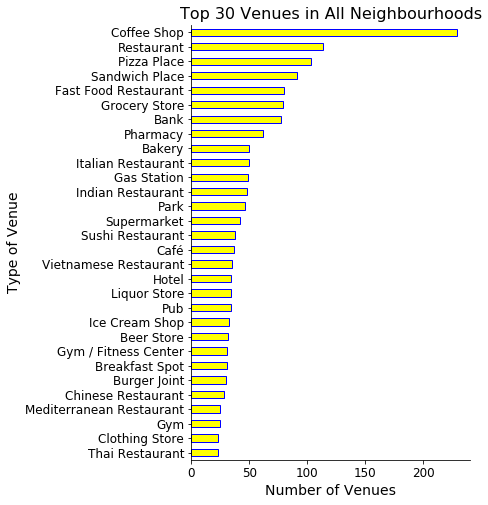

In [21]:
#there are so many venues, just take the top 30:
df1 = city_venues['Venue Category'].value_counts()
df1 = df1.head(30)

import matplotlib as mpl
import matplotlib.pyplot as plt

# figure size
fig = plt.figure(figsize=(5, 8))

ax = df1.plot(kind='barh', color=['yellow'],fontsize=12, ec='b')
ax.set_title('Top 30 Venues in All Neighbourhoods',fontsize = 16)
ax.set_ylabel('Type of Venue',fontsize = 14)
ax.set_xlabel('Number of Venues',fontsize = 14)
plt.gca().invert_yaxis()
ax.set_facecolor('w')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#### Based on the initial exploratory analysis, it is evident that Foursquare data frequency is highly influenced by restaurant data, not by daycare
Due to lower frequencies of check-ins at daycares and child cares, this will have to be intentionally searched for. The category ID's for various establishments are available from Foursquare: https://developer.foursquare.com/docs/build-with-foursquare/categories/

In [22]:
def getNearbyChoice(names, latitudes, longitudes, radius=2000):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            CLIENT_ID,CLIENT_SECRET,VERSION,lat,lng,radius,LIMIT,CHOICE)    
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        # return only relevant information for each nearby venue
        venues_list.append([(name,lat,lng, 
            v['venue']['name'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],
            v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood','Neighborhood Latitude','Neighborhood Longitude', 
                  'Venue','Venue Latitude','Venue Longitude','Venue Category']
    return(nearby_venues)

In [23]:
# Get the nearby daycare and childcare centres for each neighbourhood
CHOICE = '5744ccdfe4b0c0459246b4c7'
city_daycare = getNearbyChoice(names=city_df['Neighbourhood'],latitudes=city_df['Latitude'],longitudes=city_df['Longitude'])

#### Add a red dot on the map for every daycare and child care centre listed in Foursquare

In [24]:
# new map
map_goldenhorseshoe_2 = folium.Map(width=800,height=900,location=[43.4187, -79.7900], zoom_start=11,tiles='Stamen Toner')

# Add neighbourhood labels
for lat, lng, city, neighborhood in zip(city_df['Latitude'], city_df['Longitude'], city_df['City'], city_df['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng],radius=4,popup=label,color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.5,
        parse_html=False).add_to(map_goldenhorseshoe_2)

# Add daycare centre labels
for lat, lng, venue, neighborhood in zip(city_daycare['Venue Latitude'], city_daycare['Venue Longitude'], city_daycare['Venue Category'], city_daycare['Neighborhood']):
    label = '{}, {}'.format(venue, neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng],radius=2,popup=label,color='red',
        fill=True,fill_opacity=0.7,parse_html=False).add_to(map_goldenhorseshoe_2)  
map_goldenhorseshoe_2

In [32]:
# What is the total number of daycare & child care establishments per neighbourhood?
city_daycare.to_csv('city_daycare_output.csv')

df_daycare = city_daycare['Neighborhood'].value_counts()
df_daycare = pd.DataFrame(df_daycare)
df_daycare.reset_index(inplace=True)
df_daycare.rename(columns={'Neighborhood':'Daycare','index':'Neighbourhood'}, inplace=True)
df_daycare.head()

Neighbourhood  Daycare
0                       Waterdown        7
1                 West Hurontario        6
2                      Meadowvale        5
3  East Hurontario, West Rathwood        5
4         Lisgar, Meadowvale West        5

In [33]:
# Add the number of daycare centres to the master data frame of neighbourhoods
master_df = city_df.merge(df_daycare, on = 'Neighbourhood')
master_df.reset_index(inplace=True,drop=True)
master_df.head()

City                                      Neighbourhood Postal_code  \
0  Mississauga                                   Applewood, Dixie         L4Y   
1  Mississauga                     East Hurontario, West Rathwood         L4Z   
2  Mississauga                Mississauga Valley, East Cooksville         L5A   
3  Mississauga  City Centre, Cooksville, Fairview, East Credit...         L5B   
4  Mississauga                   West Creditview, Mavis, Erindale         L5C   

   Latitude  Longitude  Daycare  
0   43.6028   -79.5929        4  
1   43.6192   -79.6538        5  
2   43.5883   -79.6091        3  
3   43.5771   -79.6306        5  
4   43.5624   -79.6504        3

In [34]:
# How many neighbourhood were lost ?
print('Original number of neighbourhoods in list:', city_df.shape[0])
print('Number of neighbourhoods that have a daycare centre:', master_df.shape[0])
print('Number of neighbourhoods lacking daycare which were removed:', (city_df.shape[0])-(master_df.shape[0]))

Original number of neighbourhoods in list: 35
Number of neighbourhoods that have a daycare centre: 29
Number of neighbourhoods lacking daycare which were removed: 6


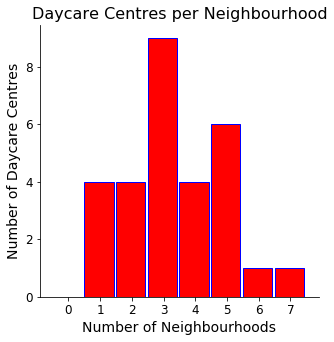

In [35]:
fig = plt.figure(figsize=(5, 5))
bin = np.arange(9) - 0.5

x0 = master_df[['Daycare']].copy()
ax = x0['Daycare'].plot(kind='hist', align='mid', width=0.92, color=['red'], bins=bin,fontsize=12,ec='b')
ax.set_title('Daycare Centres per Neighbourhood',fontsize = 16)
ax.set_ylabel('Number of Daycare Centres',fontsize = 14)
ax.set_xlabel('Number of Neighbourhoods',fontsize = 14)
ax.set_facecolor('w')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

29 of the original 35 neighbourhoods remain, as they have at least one local daycare centre.

### 3.5 Find neighbourhoods that have a local elementary school
Local determined by 1 km walking distance from neighbourhood centre. Foursquare code for elementary schools is '4f4533804b9074f6e4fb0105', and can be found here: https://developer.foursquare.com/docs/build-with-foursquare/categories/.

In [36]:
# Get the nearby daycare and childcare centres for each neighbourhood
CHOICE = '4f4533804b9074f6e4fb0105'
city_school = getNearbyChoice(names=master_df['Neighbourhood'],latitudes=master_df['Latitude'],longitudes=master_df['Longitude'])

In [37]:
# What is the total number of elementary schools per neighbourhood?
city_school.to_csv('city_school_output.csv')

df_school = city_school['Neighborhood'].value_counts()
df_school = pd.DataFrame(df_school)
df_school.reset_index(inplace=True)
df_school.rename(columns={'Neighborhood':'School','index':'Neighbourhood'}, inplace=True)
df_school

Neighbourhood  School
0   City Centre, Cooksville, Fairview, East Credit...       8
1                           Erin Mills, Business Park       7
2   Park Royal, Clarkson, Birchwood, Rattray Park ...       6
3                      East Hurontario, West Rathwood       6
4                 Sheridan Homelands, Sherwood Forest       6
5   N: Wedgewood Creek, Winston Park, River Oaks, ...       5
6                                     West Hurontario       5
7         NW: West Mount, West Oak Trails, Glen Abbey       5
8                                         East Credit       4
9   North Erin Mills, Churchill Meadows, Streetsvi...       4
10                                            Dundas        4
11                            Lisgar, Meadowvale West       4
12                                   Applewood, Dixie       3
13                   West Creditview, Mavis, Erindale       3
14  N: Alton Village, Headon Forest, Palmer, Millc...       3
15                                          Waterdown       3
16             SW Lakeview, Mineola, East Port Credit       3
17                                           Lakeview       3
18              S: Bronte, West Oakville, SW Oakville       3
19                Mississauga Valley, East Cooksville       3
20                                           Ancaster       3
21                                         Meadowvale       2
22                                      East Mountain       2
23  NE: Elizabeth Gardens, Longmoor, Pinedale, Sho...       2
24                                 E: Roseland, Dynes       1
25                                   Central Oakville       1
26                          S: Central, Plains, Maple       1
27                          W: Tyandaga, Mountainside       1

In [38]:
# Add the number of daycare centres to the master data frame of neighbourhoods
master_df = master_df.merge(df_school, on = 'Neighbourhood')
master_df.reset_index(inplace=True,drop=True)
master_df

City                                      Neighbourhood  \
0     Mississauga                                   Applewood, Dixie   
1     Mississauga                     East Hurontario, West Rathwood   
2     Mississauga                Mississauga Valley, East Cooksville   
3     Mississauga  City Centre, Cooksville, Fairview, East Credit...   
4     Mississauga                   West Creditview, Mavis, Erindale   
5     Mississauga                                           Lakeview   
6     Mississauga             SW Lakeview, Mineola, East Port Credit   
7     Mississauga  Park Royal, Clarkson, Birchwood, Rattray Park ...   
8     Mississauga                Sheridan Homelands, Sherwood Forest   
9     Mississauga                          Erin Mills, Business Park   
10    Mississauga  North Erin Mills, Churchill Meadows, Streetsvi...   
11    Mississauga                            Lisgar, Meadowvale West   
12    Mississauga                                    West Hurontario   
13    Mississauga                                        East Credit   
14    Mississauga                                         Meadowvale   
15       Oakville  N: Wedgewood Creek, Winston Park, River Oaks, ...   
16       Oakville                                   Central Oakville   
17       Oakville              S: Bronte, West Oakville, SW Oakville   
18       Oakville        NW: West Mount, West Oak Trails, Glen Abbey   
19     Burlington  NE: Elizabeth Gardens, Longmoor, Pinedale, Sho...   
20     Burlington  N: Alton Village, Headon Forest, Palmer, Millc...   
21     Burlington                                 E: Roseland, Dynes   
22     Burlington                          W: Tyandaga, Mountainside   
23     Burlington                          S: Central, Plains, Maple   
24  West Hamilton                                      East Mountain   
25  West Hamilton                                            Dundas    
26  West Hamilton                                           Ancaster   
27  West Hamilton                                          Waterdown   

   Postal_code   Latitude  Longitude  Daycare  School  
0          L4Y  43.602800 -79.592900        4       3  
1          L4Z  43.619200 -79.653800        5       6  
2          L5A  43.588300 -79.609100        3       3  
3          L5B  43.577100 -79.630600        5       8  
4          L5C  43.562400 -79.650400        3       3  
5          L5E  43.583600 -79.561000        5       3  
6          L5G  43.564700 -79.585200        3       3  
7          L5J  43.510200 -79.629600        4       6  
8          L5K  43.527200 -79.661700        3       6  
9          L5L  43.537300 -79.690300        2       7  
10         L5M  43.563700 -79.720200        5       4  
11         L5N  43.592400 -79.761100        5       4  
12         L5R  43.606000 -79.670800        6       5  
13         L5V  43.597200 -79.693100        3       4  
14         L5W  43.631300 -79.714800        5       2  
15         L6H  43.480397 -79.702388        3       5  
16         L6K  43.439600 -79.687800        2       1  
17         L6L  43.412540 -79.710121        2       3  
18         L6M  43.445136 -79.744617        1       5  
19         L7L  43.369117 -79.756033        1       2  
20         L7M  43.382747 -79.808231        2       3  
21         L7N  43.349176 -79.782273        4       1  
22         L7P  43.355300 -79.841400        3       1  
23    L7R, L7S  43.332300 -79.807732        3       1  
24         L9A  43.227100 -79.871000        1       2  
25         L9H  43.263800 -79.952400        1       4  
26         L9K  43.216840 -79.985600        4       3  
27         L0R  43.325531 -79.901658        7       3

In [39]:
# How many neighbourhood were lost so far?
print('Original number of neighbourhoods in list:', city_df.shape[0])
print('Number of neighbourhoods that have daycare and school:', master_df.shape[0])
print('Number of neighbourhoods lacking daycare or school which were removed:', (city_df.shape[0])-(master_df.shape[0]))

Original number of neighbourhoods in list: 35
Number of neighbourhoods that have daycare and school: 28
Number of neighbourhoods lacking daycare or school which were removed: 7


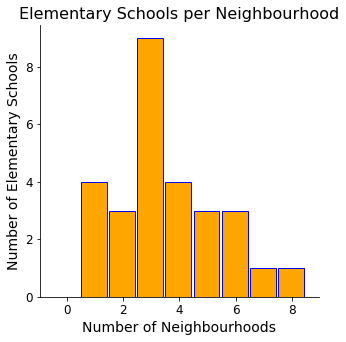

In [40]:
fig = plt.figure(figsize=(5, 5))
bin = np.arange(10) - 0.5

x0 = master_df[['School']].copy()
ax = x0['School'].plot(kind='hist', align='mid', width=0.92, color=['orange'], bins=bin,fontsize=12,ec='b')
ax.set_title('Elementary Schools per Neighbourhood',fontsize = 16)
ax.set_ylabel('Number of Elementary Schools',fontsize = 14)
ax.set_xlabel('Number of Neighbourhoods',fontsize = 14)
ax.set_facecolor('w')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [41]:
# Map the neighbourhoods with a school, that already have been filtered through having a daycare facility
# new map
map_goldenhorseshoe_3 = folium.Map(width=800,height=900,location=[43.4187, -79.7900], zoom_start=11,tiles='Stamen Toner')

# Add neighbourhood markers:
for lat, lng, city, neighborhood in zip(master_df['Latitude'], master_df['Longitude'], master_df['City'], master_df['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng],radius=4,popup=label,color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.5,
        parse_html=False).add_to(map_goldenhorseshoe_3)
    
# Add elementary school markers:   
for lat, lng, venue, neighborhood in zip(city_school['Venue Latitude'], city_school['Venue Longitude'], city_school['Venue Category'], city_school['Neighborhood']):
    label = '{}, {}'.format(venue, neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng],radius=2,popup=label,color='orange',
        fill=True,fill_opacity=0.7,parse_html=False).add_to(map_goldenhorseshoe_3)  
    
map_goldenhorseshoe_3

#### 28 Neighbourhoods have at least one local daycare centre and elementary school
### 3.6 Evaluate Neighbourhood Recreational Quantity and Diversity 
Now, time to research the diversity of the outdoor facilities and athletic facilities available per neighbourhood. The outdoor facilities of interest to the couple are: 
   * Playground			   
   * Bike Trail			   
   * Beach			    	
   * Botanical Garden		
   * Dog Run				 
   * Fishing Spot			
   * Lake			    	 
   * Nature Preserve		  
   * Other Great Outdoors	 
   * Park					 
   * Pool	
   
Furthermore, the couples are interested in athletic facilities such as:
   
   * Gym / Fitness Center	 
   * Boxing Gym			  
   * Climbing Gym			
   * Cycle Studio			 
   * Gym Pool				
   * Gymnastics Gym		
   * Gym					  
   * Martial Arts Dojo	    
   * Outdoor Gym			
   * Pilates Studio		   
   * Track				    
   * Yoga Studio			 
   * Indoor Play Area		
   * Recreation Center	  
    
#### Use 'Outdoors & Recreation' category ID from Foursquare

In [42]:
# Outdoors & Recreation
CHOICE = '4d4b7105d754a06377d81259'
city_outdoors = getNearbyChoice(names=master_df['Neighbourhood'],latitudes=master_df['Latitude'],longitudes=master_df['Longitude'])

In [43]:
city_outdoors.to_csv('city_outdoors_output.csv', index=False)
city_outdoors.head(10)

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Applewood, Dixie                43.6028                -79.5929   
1  Applewood, Dixie                43.6028                -79.5929   
2  Applewood, Dixie                43.6028                -79.5929   
3  Applewood, Dixie                43.6028                -79.5929   
4  Applewood, Dixie                43.6028                -79.5929   
5  Applewood, Dixie                43.6028                -79.5929   
6  Applewood, Dixie                43.6028                -79.5929   
7  Applewood, Dixie                43.6028                -79.5929   
8  Applewood, Dixie                43.6028                -79.5929   
9  Applewood, Dixie                43.6028                -79.5929   

                               Venue  Venue Latitude  Venue Longitude  \
0                 Dixie Curling Club       43.605886       -79.591427   
1                        Up The Bloc       43.603683       -79.584380   
2                         LA Fitness       43.609377       -79.587270   
3                 F45 Training Dixie       43.608640       -79.584279   
4                  Physiomed Fitness       43.610196       -79.586744   
5           Wynn Fitness Mississauga       43.613754       -79.577678   
6               Bloor Athletic Field       43.605741       -79.605066   
7  All Canadian Martial Arts Academy       43.606854       -79.580298   
8                    Queensway Trail       43.588504       -79.589164   
9                 Wynn Fitness Clubs       43.614152       -79.578427   

         Venue Category  
0           Curling Ice  
1          Climbing Gym  
2  Gym / Fitness Center  
3                   Gym  
4  Gym / Fitness Center  
5                   Gym  
6          Soccer Field  
7     Martial Arts Dojo  
8                 Trail  
9  Gym / Fitness Center

#### How many total unique venue categories were found in the Recreation & Outdoors search?

In [44]:
print('There are {} unique recreation categories.'.format(len(city_outdoors['Venue Category'].unique())))

There are 38 unique recreation categories.


#### How many recreational venues were found per neighbourhood?

In [45]:
df_outdoors = city_outdoors['Neighborhood'].value_counts()
df_outdoors = pd.DataFrame(df_outdoors)
df_outdoors.reset_index(inplace=True)
df_outdoors.rename(columns={'Neighborhood':'Recreation','index':'Neighbourhood'}, inplace=True)
df_outdoors.head()

Neighbourhood  Recreation
0                                   Central Oakville          32
1             SW Lakeview, Mineola, East Port Credit          32
2  N: Alton Village, Headon Forest, Palmer, Millc...          27
3  City Centre, Cooksville, Fairview, East Credit...          23
4                                           Lakeview          22

In [46]:
# Add the number of recreation centres to the master data frame of neighbourhoods
master_df = master_df.merge(df_outdoors, on = 'Neighbourhood')
master_df.reset_index(inplace=True,drop=True)
master_df.head()

City                                      Neighbourhood Postal_code  \
0  Mississauga                                   Applewood, Dixie         L4Y   
1  Mississauga                     East Hurontario, West Rathwood         L4Z   
2  Mississauga                Mississauga Valley, East Cooksville         L5A   
3  Mississauga  City Centre, Cooksville, Fairview, East Credit...         L5B   
4  Mississauga                   West Creditview, Mavis, Erindale         L5C   

   Latitude  Longitude  Daycare  School  Recreation  
0   43.6028   -79.5929        4       3          17  
1   43.6192   -79.6538        5       6          15  
2   43.5883   -79.6091        3       3          18  
3   43.5771   -79.6306        5       8          23  
4   43.5624   -79.6504        3       3          20

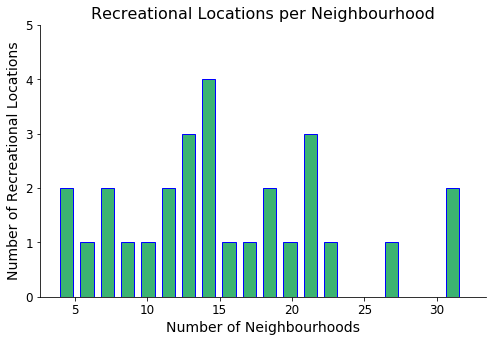

In [47]:
x0 = master_df[['Recreation']].copy()
ax = x0['Recreation'].plot(kind='hist', align='mid', width=0.92, color=['mediumseagreen'],bins=20,fontsize=12,ec='b',figsize=(8, 5))
ax.set_title('Recreational Locations per Neighbourhood',fontsize = 16)
ax.set_ylabel('Number of Recreational Locations',fontsize = 14)
ax.set_xlabel('Number of Neighbourhoods',fontsize = 14)
ax.set_ylim([0,5])
ax.set_facecolor('w')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

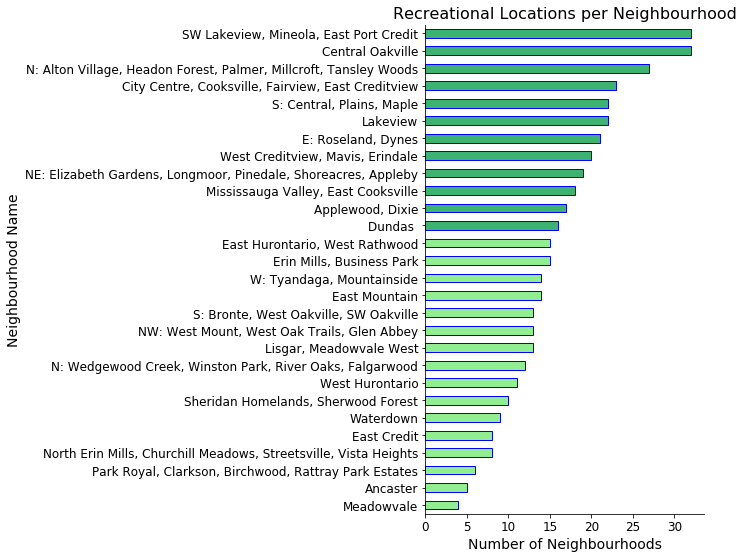

In [48]:
a1 = master_df[['Neighbourhood','Recreation']].copy()
a1.set_index('Neighbourhood', inplace = True)
a1.sort_values('Recreation', ascending = False, inplace = True)
list = ['mediumseagreen','mediumseagreen','mediumseagreen','mediumseagreen','mediumseagreen','mediumseagreen','mediumseagreen',
        'mediumseagreen','mediumseagreen','mediumseagreen','mediumseagreen','mediumseagreen',
        'lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen',
        'lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen']
ax = a1['Recreation'].plot(kind='barh', color=list,ec='b',figsize=(5, 9),fontsize = 12)
ax.set_title('Recreational Locations per Neighbourhood',fontsize = 16)
ax.set_ylabel('Neighbourhood Name',fontsize = 14)
ax.set_xlabel('Number of Neighbourhoods',fontsize = 14)
plt.gca().invert_yaxis()
ax.set_facecolor('w')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [49]:
#Determine the most frequent types of recreation venues
df = city_outdoors['Venue Category'].value_counts()
df = pd.DataFrame(df)
df.head(10)

Venue Category
Park                             114
Gym                               63
Gym / Fitness Center              62
Skating Rink                      21
Soccer Field                      17
Yoga Studio                       17
Trail                             16
Baseball Field                    16
Athletics & Sports                15
Golf Course                       13

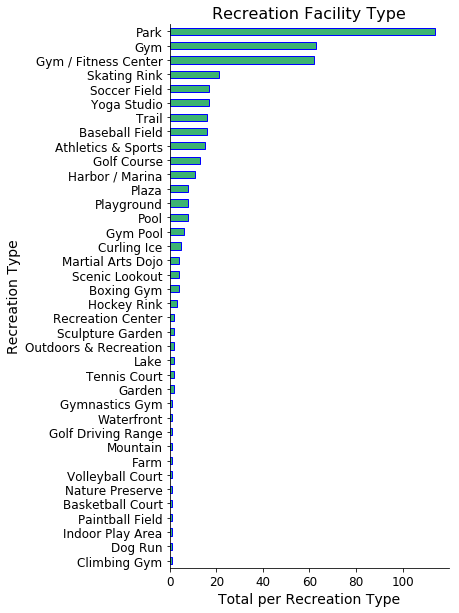

In [50]:
ax = df['Venue Category'].plot(kind='barh', color='mediumseagreen',figsize=(5, 10),ec='b',fontsize = 12)
ax.set_title('Recreation Facility Type',fontsize = 16)
ax.set_ylabel('Recreation Type',fontsize = 14)
ax.set_xlabel('Total per Recreation Type',fontsize = 14)
plt.gca().invert_yaxis()
ax.set_facecolor('w')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [51]:
# View recreaton locations on map
# new map
map_goldenhorseshoe_4 = folium.Map(width=800,height=900,location=[43.4187, -79.7900], zoom_start=11,tiles='Stamen Toner')

# Add neighbourhood labels
for lat, lng, city, neighborhood in zip(master_df['Latitude'], master_df['Longitude'], master_df['City'], master_df['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng],radius=4,popup=label,color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.5,
        parse_html=False).add_to(map_goldenhorseshoe_4)

# Add recreation facility markers:  
for lat, lng, venue, neighborhood in zip(city_outdoors['Venue Latitude'], city_outdoors['Venue Longitude'], city_outdoors['Venue Category'], city_outdoors['Neighborhood']):
    label = '{}, {}'.format(venue, neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng],radius=2,popup=label,color='mediumseagreen',
        fill=True,fill_opacity=0.7,parse_html=False).add_to(map_goldenhorseshoe_4)  
map_goldenhorseshoe_4

In [52]:
# one hot encoding: turn the venue categories into numerical values
city_onehot = pd.get_dummies(city_outdoors[['Venue Category']], prefix="", prefix_sep="")

# add 'neighbourhood' column to dataframe
city_onehot['New'] = city_outdoors['Neighborhood'] 
city_onehot.insert(0, 'Neighbourhood', city_onehot['New'], True)
city_onehot.drop(['New'], axis=1, inplace=True)

# determine relative frequency of each venue category per neighbourhood
city_onehot = city_onehot.groupby('Neighbourhood').mean().reset_index()

city_onehot.head()

Neighbourhood  Athletics & Sports  \
0                                           Ancaster            0.000000   
1                                   Applewood, Dixie            0.000000   
2                                   Central Oakville            0.062500   
3  City Centre, Cooksville, Fairview, East Credit...            0.043478   
4                                            Dundas             0.000000   

   Baseball Field  Basketball Court  Boxing Gym  Climbing Gym  Curling Ice  \
0          0.2000               0.0    0.000000      0.000000     0.000000   
1          0.0000               0.0    0.000000      0.058824     0.058824   
2          0.0000               0.0    0.000000      0.000000     0.031250   
3          0.0000               0.0    0.043478      0.000000     0.000000   
4          0.0625               0.0    0.000000      0.000000     0.062500   

   Dog Run  Farm  Garden  ...  Recreation Center  Scenic Lookout  \
0      0.0   0.0     0.0  ...                0.0          0.0000   
1      0.0   0.0     0.0  ...                0.0          0.0000   
2      0.0   0.0     0.0  ...                0.0          0.0000   
3      0.0   0.0     0.0  ...                0.0          0.0000   
4      0.0   0.0     0.0  ...                0.0          0.0625   

   Sculpture Garden  Skating Rink  Soccer Field  Tennis Court     Trail  \
0          0.000000      0.200000      0.000000           0.0  0.000000   
1          0.000000      0.000000      0.058824           0.0  0.058824   
2          0.000000      0.031250      0.000000           0.0  0.000000   
3          0.043478      0.086957      0.043478           0.0  0.043478   
4          0.000000      0.062500      0.062500           0.0  0.125000   

   Volleyball Court  Waterfront  Yoga Studio  
0               0.0         0.0     0.000000  
1               0.0         0.0     0.117647  
2               0.0         0.0     0.156250  
3               0.0         0.0     0.043478  
4               0.0         0.0     0.125000  

[5 rows x 39 columns]

### 3.7 Prescriptive Analytics
Principal component analysis (PCA) is dimensionality reduction technique, which increases the interpretation of data while minimizing information loss. Use principal component analysis to determine neighbourhoods that offer similar recreation facilities.

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA

In [54]:
rec_X = city_onehot.iloc[:,1:].values  
rec_X[0]

array([0. , 0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0. , 0. , 0.2,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0. ,
       0. , 0. , 0. , 0. , 0. , 0.2, 0. , 0. , 0. , 0. , 0. , 0. ])

In [55]:
rec_Y = city_onehot['Neighbourhood'].values
rec_Y[0:5]

array(['Ancaster', 'Applewood, Dixie', 'Central Oakville',
       'City Centre, Cooksville, Fairview, East Creditview', 'Dundas '],
      dtype=object)

In [56]:
pca = PCA(n_components=2)
pca.fit(rec_X)

rec_X_pca = pca.transform(rec_X)
print("original shape:   ", rec_X.shape)
print("transformed shape:", rec_X_pca.shape)
print("explained variance: PC#1 is", pca.explained_variance_ratio_[0]*100, "%, and PC#2 is", pca.explained_variance_ratio_[1]*100, "%")

original shape:    (28, 38)
transformed shape: (28, 2)
explained variance: PC#1 is 31.02094178595208 %, and PC#2 is 16.80151303741321 %


In [57]:
# Create dataframe for PCA cordinates
PCA_df = pd.DataFrame(rec_X_pca)
PCA_df['New'] = city_onehot['Neighbourhood'] 
PCA_df.insert(0, 'Neighbourhood', PCA_df['New'], True)
PCA_df.drop(['New'], axis=1, inplace=True)
PCA_df.rename(columns={0:'PC#1'}, inplace=True)
PCA_df.rename(columns={1:'PC#2'}, inplace=True)
PCA_df.head()

Neighbourhood      PC#1      PC#2
0                                           Ancaster  0.100606  0.171887
1                                   Applewood, Dixie  0.016479 -0.002556
2                                   Central Oakville  0.084771 -0.037081
3  City Centre, Cooksville, Fairview, East Credit...  0.055654  0.073381
4                                            Dundas   0.066575  0.050090

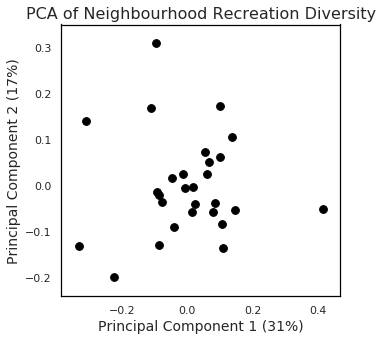

In [58]:
ax = PCA_df.plot(kind='scatter', x='PC#1', y='PC#2', color='black',figsize=(5,5),s=60)
ax.set_title('PCA of Neighbourhood Recreation Diversity',fontsize = 16)
ax.set_ylabel('Principal Component 2 (17%)',fontsize = 14)
ax.set_xlabel('Principal Component 1 (31%)',fontsize = 14)
ax.set_facecolor('w')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')

In [59]:
# Cluster the neighbourhoods using k-means, and 4 distinct clusters based on the PCA above
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)
k_means.fit(rec_X_pca)
k_means_labels = k_means.labels_
print("The k means labels are:", k_means_labels)
k_means_cluster_centers = k_means.cluster_centers_

The k means labels are: [0 0 0 0 0 0 1 0 0 2 0 0 3 0 2 0 0 2 2 1 0 0 2 2 0 1 0 2]


In [60]:
#Add a new column for the KMeans Cluster
km = pd.DataFrame(k_means_labels)
PCA_df['New'] = km 
PCA_df.insert(1, 'KMeans Cluster', PCA_df['New'], True)
PCA_df.drop(['New'], axis=1, inplace=True)
PCA_df.head()

Neighbourhood  KMeans Cluster  \
0                                           Ancaster               0   
1                                   Applewood, Dixie               0   
2                                   Central Oakville               0   
3  City Centre, Cooksville, Fairview, East Credit...               0   
4                                            Dundas                0   

       PC#1      PC#2  
0  0.100606  0.171887  
1  0.016479 -0.002556  
2  0.084771 -0.037081  
3  0.055654  0.073381  
4  0.066575  0.050090

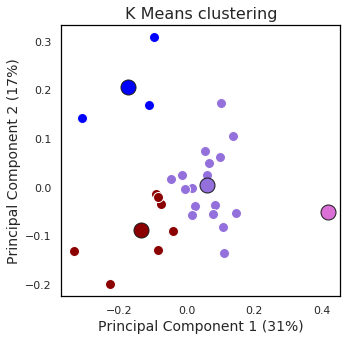

In [78]:
# Initialize the plot with the specified dimensions
fig = plt.figure(figsize=(5, 5))
x = np.arange(4)
color_list = ['mediumpurple','blue','darkred','orchid']

# Create a plot
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), color_list):
    my_members = (k_means_labels == k)
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    # Plots the datapoints with color col.
    ax.plot(rec_X_pca[my_members, 0], rec_X_pca[my_members, 1], 'w', markerfacecolor=col, marker='o',markersize=10)
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=15)

ax.set_title('K Means clustering',fontsize = 16)
ax.set_ylabel('Principal Component 2 (17%)',fontsize = 14)
ax.set_xlabel('Principal Component 1 (31%)',fontsize = 14)
ax.set_facecolor('w')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')

In [62]:
#Add the KMeans cluster to the master spread sheet
master_df = master_df.merge(PCA_df, on = 'Neighbourhood')
master_df

City                                      Neighbourhood  \
0     Mississauga                                   Applewood, Dixie   
1     Mississauga                     East Hurontario, West Rathwood   
2     Mississauga                Mississauga Valley, East Cooksville   
3     Mississauga  City Centre, Cooksville, Fairview, East Credit...   
4     Mississauga                   West Creditview, Mavis, Erindale   
5     Mississauga                                           Lakeview   
6     Mississauga             SW Lakeview, Mineola, East Port Credit   
7     Mississauga  Park Royal, Clarkson, Birchwood, Rattray Park ...   
8     Mississauga                Sheridan Homelands, Sherwood Forest   
9     Mississauga                          Erin Mills, Business Park   
10    Mississauga  North Erin Mills, Churchill Meadows, Streetsvi...   
11    Mississauga                            Lisgar, Meadowvale West   
12    Mississauga                                    West Hurontario   
13    Mississauga                                        East Credit   
14    Mississauga                                         Meadowvale   
15       Oakville  N: Wedgewood Creek, Winston Park, River Oaks, ...   
16       Oakville                                   Central Oakville   
17       Oakville              S: Bronte, West Oakville, SW Oakville   
18       Oakville        NW: West Mount, West Oak Trails, Glen Abbey   
19     Burlington  NE: Elizabeth Gardens, Longmoor, Pinedale, Sho...   
20     Burlington  N: Alton Village, Headon Forest, Palmer, Millc...   
21     Burlington                                 E: Roseland, Dynes   
22     Burlington                          W: Tyandaga, Mountainside   
23     Burlington                          S: Central, Plains, Maple   
24  West Hamilton                                      East Mountain   
25  West Hamilton                                            Dundas    
26  West Hamilton                                           Ancaster   
27  West Hamilton                                          Waterdown   

   Postal_code   Latitude  Longitude  Daycare  School  Recreation  \
0          L4Y  43.602800 -79.592900        4       3          17   
1          L4Z  43.619200 -79.653800        5       6          15   
2          L5A  43.588300 -79.609100        3       3          18   
3          L5B  43.577100 -79.630600        5       8          23   
4          L5C  43.562400 -79.650400        3       3          20   
5          L5E  43.583600 -79.561000        5       3          22   
6          L5G  43.564700 -79.585200        3       3          32   
7          L5J  43.510200 -79.629600        4       6           6   
8          L5K  43.527200 -79.661700        3       6          10   
9          L5L  43.537300 -79.690300        2       7          15   
10         L5M  43.563700 -79.720200        5       4           8   
11         L5N  43.592400 -79.761100        5       4          13   
12         L5R  43.606000 -79.670800        6       5          11   
13         L5V  43.597200 -79.693100        3       4           8   
14         L5W  43.631300 -79.714800        5       2           4   
15         L6H  43.480397 -79.702388        3       5          12   
16         L6K  43.439600 -79.687800        2       1          32   
17         L6L  43.412540 -79.710121        2       3          13   
18         L6M  43.445136 -79.744617        1       5          13   
19         L7L  43.369117 -79.756033        1       2          19   
20         L7M  43.382747 -79.808231        2       3          27   
21         L7N  43.349176 -79.782273        4       1          21   
22         L7P  43.355300 -79.841400        3       1          14   
23    L7R, L7S  43.332300 -79.807732        3       1          22   
24         L9A  43.227100 -79.871000        1       2          14   
25         L9H  43.263800 -79.952400        1       4          16   
26         L9K  43.216840 -79.985600        4       3        

#### Visualize the 4 neighbourhood types on the map to see if they associate by location

In [64]:
# new map
map_goldenhorseshoe_5 = folium.Map(width=800,height=900,location=[43.4187, -79.7900], zoom_start=11,tiles='Stamen Toner')

# set color scheme for the clusters, have to a different order than K Means algorithmn, in order to stay consistent with colouring between plots
#KMeans color_list = ['mediumpurple','blue','darkred','orchid']
rainbow = ['blue','darkred','orchid','mediumpurple']

# add markers to the map, for KMeans Clustered neighbourhoods
markers_colors = []
for lat, lon, poi, cluster in zip(master_df['Latitude'], master_df['Longitude'], master_df['Neighbourhood'], master_df['KMeans Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=1).add_to(map_goldenhorseshoe_5)
    
map_goldenhorseshoe_5

#### Legend
cluster 0 = purple  
cluster 1 = blue  
cluster 2 = maroon  
cluster 3 = pink

In [65]:
master_df.head()

City                                      Neighbourhood Postal_code  \
0  Mississauga                                   Applewood, Dixie         L4Y   
1  Mississauga                     East Hurontario, West Rathwood         L4Z   
2  Mississauga                Mississauga Valley, East Cooksville         L5A   
3  Mississauga  City Centre, Cooksville, Fairview, East Credit...         L5B   
4  Mississauga                   West Creditview, Mavis, Erindale         L5C   

   Latitude  Longitude  Daycare  School  Recreation  KMeans Cluster      PC#1  \
0   43.6028   -79.5929        4       3          17               0  0.016479   
1   43.6192   -79.6538        5       6          15               0  0.136981   
2   43.5883   -79.6091        3       3          18               0 -0.045249   
3   43.5771   -79.6306        5       8          23               0  0.055654   
4   43.5624   -79.6504        3       3          20               0  0.099627   

       PC#2  
0 -0.002556  
1  0.104829  
2  0.015593  
3  0.073381  
4  0.061834

## 3.8 Key features of the 4 Neighbourhood Clusters
Let's investigate the leading characteristics of the 4 different clusters, as well as the leading neighbourhoods in each cluster in terms of recreational facility quantity. 
#### Let's prepare the data, then subset by cluster

In [66]:
city_onehot.shape

(28, 39)

In [67]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)    
    return row_categories_sorted.index.values[0:num_top_venues]

In [68]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
rec_sorted = pd.DataFrame(columns=columns)
rec_sorted['Neighbourhood'] = city_onehot['Neighbourhood']

for ind in np.arange(city_onehot.shape[0]):
    rec_sorted.iloc[ind, 1:] = return_most_common_venues(city_onehot.iloc[ind, :], num_top_venues)

In [69]:
rec_sorted.head()

Neighbourhood 1st Most Common Venue  \
0                                           Ancaster           Golf Course   
1                                   Applewood, Dixie                  Park   
2                                   Central Oakville                  Park   
3  City Centre, Cooksville, Fairview, East Credit...  Gym / Fitness Center   
4                                            Dundas                   Park   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0        Baseball Field          Skating Rink  Gym / Fitness Center   
1  Gym / Fitness Center                   Gym           Yoga Studio   
2                   Gym           Yoga Studio  Gym / Fitness Center   
3                  Park                 Plaza                   Gym   
4           Yoga Studio  Gym / Fitness Center                 Trail   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0                  Park           Yoga Studio       Harbor / Marina   
1                 Trail     Martial Arts Dojo          Soccer Field   
2       Harbor / Marina    Athletics & Sports          Skating Rink   
3          Skating Rink           Yoga Studio                  Pool   
4        Scenic Lookout                   Gym           Curling Ice   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0        Gymnastics Gym              Gym Pool                    Gym  
1          Climbing Gym           Curling Ice         Gymnastics Gym  
2            Playground           Curling Ice            Golf Course  
3            Boxing Gym    Athletics & Sports       Sculpture Garden  
4                 Plaza          Skating Rink           Soccer Field

In [70]:
#Add the top recreation venues to the master spread sheet
master_df = master_df.merge(rec_sorted, on = 'Neighbourhood')
master_df.to_csv('master_df_output.csv', index=False)
master_df.head()

City                                      Neighbourhood Postal_code  \
0  Mississauga                                   Applewood, Dixie         L4Y   
1  Mississauga                     East Hurontario, West Rathwood         L4Z   
2  Mississauga                Mississauga Valley, East Cooksville         L5A   
3  Mississauga  City Centre, Cooksville, Fairview, East Credit...         L5B   
4  Mississauga                   West Creditview, Mavis, Erindale         L5C   

   Latitude  Longitude  Daycare  School  Recreation  KMeans Cluster      PC#1  \
0   43.6028   -79.5929        4       3          17               0  0.016479   
1   43.6192   -79.6538        5       6          15               0  0.136981   
2   43.5883   -79.6091        3       3          18               0 -0.045249   
3   43.5771   -79.6306        5       8          23               0  0.055654   
4   43.5624   -79.6504        3       3          20               0  0.099627   

   ...  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0  ...                   Park  Gym / Fitness Center                   Gym   
1  ...   Gym / Fitness Center           Golf Course          Soccer Field   
2  ...                   Park                 Trail                 Plaza   
3  ...   Gym / Fitness Center                  Park                 Plaza   
4  ...                   Park                 Trail  Gym / Fitness Center   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0           Yoga Studio                 Trail     Martial Arts Dojo   
1                   Gym                  Park    Athletics & Sports   
2  Gym / Fitness Center                  Pool                   Gym   
3                   Gym          Skating Rink           Yoga Studio   
4           Yoga Studio                   Gym        Baseball Field   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0          Soccer Field          Climbing Gym           Curling Ice   
1        Baseball Field            Boxing Gym          Skating Rink   
2    Athletics & Sports          Skating Rink          Soccer Field   
3                  Pool            Boxing Gym    Athletics & Sports   
4            Boxing Gym           Golf Course    Athletics & Sports   

  10th Most Common Venue  
0         Gymnastics Gym  
1         Gymnastics Gym  
2           Tennis Court  
3       Sculpture Garden  
4           Soccer Field  

[5 rows x 21 columns]

### Cluster 0

In [71]:
#subset cluster 0
options = ['0']
cluster0 = master_df[master_df['KMeans Cluster'].isin(options)]
cluster0.sort_values('Recreation',ascending=False)

City                                      Neighbourhood  \
16       Oakville                                   Central Oakville   
3     Mississauga  City Centre, Cooksville, Fairview, East Credit...   
5     Mississauga                                           Lakeview   
23     Burlington                          S: Central, Plains, Maple   
21     Burlington                                 E: Roseland, Dynes   
4     Mississauga                   West Creditview, Mavis, Erindale   
19     Burlington  NE: Elizabeth Gardens, Longmoor, Pinedale, Sho...   
2     Mississauga                Mississauga Valley, East Cooksville   
0     Mississauga                                   Applewood, Dixie   
25  West Hamilton                                            Dundas    
1     Mississauga                     East Hurontario, West Rathwood   
22     Burlington                          W: Tyandaga, Mountainside   
24  West Hamilton                                      East Mountain   
17       Oakville              S: Bronte, West Oakville, SW Oakville   
11    Mississauga                            Lisgar, Meadowvale West   
15       Oakville  N: Wedgewood Creek, Winston Park, River Oaks, ...   
26  West Hamilton                                           Ancaster   

   Postal_code   Latitude  Longitude  Daycare  School  Recreation  \
16         L6K  43.439600 -79.687800        2       1          32   
3          L5B  43.577100 -79.630600        5       8          23   
5          L5E  43.583600 -79.561000        5       3          22   
23    L7R, L7S  43.332300 -79.807732        3       1          22   
21         L7N  43.349176 -79.782273        4       1          21   
4          L5C  43.562400 -79.650400        3       3          20   
19         L7L  43.369117 -79.756033        1       2          19   
2          L5A  43.588300 -79.609100        3       3          18   
0          L4Y  43.602800 -79.592900        4       3          17   
25         L9H  43.263800 -79.952400        1       4          16   
1          L4Z  43.619200 -79.653800        5       6          15   
22         L7P  43.355300 -79.841400        3       1          14   
24         L9A  43.227100 -79.871000        1       2          14   
17         L6L  43.412540 -79.710121        2       3          13   
11         L5N  43.592400 -79.761100        5       4          13   
15         L6H  43.480397 -79.702388        3       5          12   
26         L9K  43.216840 -79.985600        4       3           5   

    KMeans Cluster      PC#1  ...  1st Most Common Venue  \
16               0  0.084771  ...                   Park   
3                0  0.055654  ...   Gym / Fitness Center   
5                0  0.077767  ...                   Park   
23               0  0.015443  ...                   Park   
21               0  0.145417  ...                    Gym   
4                0  0.099627  ...                   Park   
19               0  0.059768  ...                   Park   
2                0 -0.045249  ...                   Park   
0                0  0.016479  ...                   Park   
25               0  0.066575  ...                   Park   
1                0  0.136981  ...   Gym / Fitness Center   
22               0 -0.014143  ...                   Park   
24               0  0.110390  ...                    Gym   
17               0  0.025131  ...                    Gym   
11               0  0.107827  ...                    Gym   
15               0 -0.005772  ...   Gym / Fitness Center   
26               0  0.100606  ...            Golf Course   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
16                   Gym           Yoga Studio  Gym / Fitness Center   
3                   Park                 Plaza                   Gym   
5                    Gym           Yoga Studio          Skating Rink   
23                   Gym        Baseball Field  Gym / Fitness Center   
21                  Park        

In [72]:
#What is the average number of venues in this cluster?
print('The average number of facilities in this cluster are:')
print('Daycare:', round(cluster0['Daycare'].mean(axis=0),0))
print('Schools:', round(cluster0['School'].mean(axis=0),0))
print('Recreation:', round(cluster0['Recreation'].mean(axis=0),0))

The average number of facilities in this cluster are:
Daycare: 3.0
Schools: 3.0
Recreation: 17.0


#### Cluster 0, park and gyms are equally represented as the most common recreational venue, and there is a high degree of heterogeneity in the less frequent venues. Overall, this cluster has the highest quantity of recreational venues.

### Cluster 1

In [73]:
#subset cluster 1
options = ['1']
cluster1 = master_df[master_df['KMeans Cluster'].isin(options)]
cluster1.sort_values('Recreation',ascending=False)

City                                      Neighbourhood  \
27  West Hamilton                                          Waterdown   
13    Mississauga                                        East Credit   
7     Mississauga  Park Royal, Clarkson, Birchwood, Rattray Park ...   

   Postal_code   Latitude  Longitude  Daycare  School  Recreation  \
27         L0R  43.325531 -79.901658        7       3           9   
13         L5V  43.597200 -79.693100        3       4           8   
7          L5J  43.510200 -79.629600        4       6           6   

    KMeans Cluster      PC#1  ...  1st Most Common Venue  \
27               1 -0.096208  ...   Gym / Fitness Center   
13               1 -0.110022  ...                   Park   
7                1 -0.310871  ...                   Park   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
27                  Park                 Trail    Golf Driving Range   
13           Golf Course  Gym / Fitness Center          Soccer Field   
7   Gym / Fitness Center          Tennis Court           Yoga Studio   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
27        Scenic Lookout           Yoga Studio                Garden   
13           Yoga Studio       Harbor / Marina        Gymnastics Gym   
7            Golf Course       Harbor / Marina        Gymnastics Gym   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
27        Gymnastics Gym              Gym Pool                    Gym  
13              Gym Pool                   Gym     Golf Driving Range  
7               Gym Pool                   Gym     Golf Driving Range  

[3 rows x 21 columns]

In [74]:
#What is the average number of venues in this cluster?
print('The average number of facilities in this cluster are:')
print('Daycare:', round(cluster1['Daycare'].mean(axis=0),0))
print('Schools:', round(cluster1['School'].mean(axis=0),0))
print('Recreation:', round(cluster1['Recreation'].mean(axis=0),0))

The average number of facilities in this cluster are:
Daycare: 5.0
Schools: 4.0
Recreation: 8.0


### Cluster 1 summary

Cluster 1 has less emphasis on parks, and a greater emphasis on gyms, golfing, yoga studios. Overall, has less than half the total venues available compared to cluster 0 and 1. However, there are more daycare centres available per neighbourhood than all other clusters. This cluster has below average number of recreational venues, the average is only 8 (range 6-9).

### Cluster 2

In [75]:
#subset cluster 2
options = ['2']
cluster2 = master_df[master_df['KMeans Cluster'].isin(options)]
cluster2.sort_values('Recreation',ascending=False)

City                                      Neighbourhood  \
6   Mississauga             SW Lakeview, Mineola, East Port Credit   
20   Burlington  N: Alton Village, Headon Forest, Palmer, Millc...   
9   Mississauga                          Erin Mills, Business Park   
18     Oakville        NW: West Mount, West Oak Trails, Glen Abbey   
12  Mississauga                                    West Hurontario   
8   Mississauga                Sheridan Homelands, Sherwood Forest   
10  Mississauga  North Erin Mills, Churchill Meadows, Streetsvi...   

   Postal_code   Latitude  Longitude  Daycare  School  Recreation  \
6          L5G  43.564700 -79.585200        3       3          32   
20         L7M  43.382747 -79.808231        2       3          27   
9          L5L  43.537300 -79.690300        2       7          15   
18         L6M  43.445136 -79.744617        1       5          13   
12         L5R  43.606000 -79.670800        6       5          11   
8          L5K  43.527200 -79.661700        3       6          10   
10         L5M  43.563700 -79.720200        5       4           8   

    KMeans Cluster      PC#1  ...  1st Most Common Venue  \
6                2 -0.039513  ...                   Park   
20               2 -0.092110  ...                   Park   
9                2 -0.076264  ...                   Park   
18               2 -0.225695  ...                   Park   
12               2 -0.085432  ...                   Park   
8                2 -0.084874  ...                   Park   
10               2 -0.333135  ...                   Park   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
6        Harbor / Marina                   Gym          Skating Rink   
20  Gym / Fitness Center                   Gym        Baseball Field   
9   Gym / Fitness Center                   Gym                  Pool   
18                 Trail                   Gym          Skating Rink   
12  Gym / Fitness Center                   Gym    Athletics & Sports   
8                    Gym    Athletics & Sports        Baseball Field   
10              Gym Pool  Gym / Fitness Center                   Gym   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
6   Gym / Fitness Center                  Pool                 Trail   
20    Athletics & Sports     Martial Arts Dojo          Soccer Field   
9             Playground      Basketball Court          Skating Rink   
18           Yoga Studio                Garden        Gymnastics Gym   
12           Golf Course            Boxing Gym       Harbor / Marina   
8   Gym / Fitness Center            Playground    Golf Driving Range   
10           Yoga Studio           Golf Course       Harbor / Marina   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
6             Waterfront     Martial Arts Dojo            Yoga Studio  
20              Gym Pool       Paintball Field            Golf Course  
9         Gymnastics Gym              Gym Pool     Golf Driving Range  
18              Gym Pool  Gym / Fitness Center     Golf Driving Range  
12        Gymnastics Gym              Gym Pool     Golf Driving Range  
8        Harbor / Marina        Gymnastics Gym               Gym Pool  
10        Gymnastics Gym    Golf Driving Range                 Garden  

[7 rows x 21 columns]

In [76]:
#What is the average number of venues in this cluster?
print('The average number of facilities in this cluster are:')
print('Daycare:', round(cluster2['Daycare'].mean(axis=0),0))
print('Schools:', round(cluster2['School'].mean(axis=0),0))
print('Recreation:', round(cluster2['Recreation'].mean(axis=0),0))

The average number of facilities in this cluster are:
Daycare: 3.0
Schools: 5.0
Recreation: 17.0


#### Cluster 2 has a high emphasis on parks, then gyms, and heterogeneous collection of individual sport venues such as: baseball, playground, boxing, martial arts, and lastly, golf. Trails, waterfront, and harbour access are also commonly emphasized. The average number of daycare centres is 3, and the average number of elementary schools is 5 per neighbourhood, which is the highest of all the clusters. 

### Cluster 3 (only 1 neighbourhood)

In [79]:
#subset cluster 3
options = ['3']
cluster3 = master_df[master_df['KMeans Cluster'].isin(options)]
cluster3.sort_values('Recreation',ascending=False)

City Neighbourhood Postal_code  Latitude  Longitude  Daycare  \
14  Mississauga    Meadowvale         L5W   43.6313   -79.7148        5   

    School  Recreation  KMeans Cluster      PC#1  ...  1st Most Common Venue  \
14       2           4               3  0.416854  ...            Golf Course   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
14        Baseball Field       Nature Preserve                   Gym   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
14           Yoga Studio       Harbor / Marina        Gymnastics Gym   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
14              Gym Pool  Gym / Fitness Center     Golf Driving Range  

[1 rows x 21 columns]

In [80]:
#What is the average number of venues in this cluster?
print('The number of facilities in this cluster are:')
print('Daycare: 5')
print('Schools: 2')
print('Recreation: 4')

The number of facilities in this cluster are:
Daycare: 5
Schools: 2
Recreation: 4


#### Cluster 3 neighbourhood prioritizes golf, gym, and gymnastics. It has the lowest total number of recreational venues.

## 3.9 Narrowing Down Neighbourhood Clusters 0 and 2

Since there are still many suitable neighbourhoods, which meet the couple's list of requirements. The couples have decided they would also prefer a neighbourhood with a local martial arts dojo. Therefore, they wish to narrow down the neighbourhoods featured in Cluster 0 and 2, since they have to most recreational facilities. The bottom half of neighbourhoods in the remaining 24 were removed as they have fewer than 16 recreational facilities (16 is mid-way from 32 to zero). Now, 12 neighbourhoods remain.

In [82]:
options = ['0','2']
master_narrow = master_df[master_df['KMeans Cluster'].isin(options)]
master_narrow = master_narrow.sort_values('Recreation',ascending=False)
master_narrow.reset_index(inplace=True,drop=True)
master_narrow.drop([12,13,14,15,16,17,18,19,20,21,21,22,23], axis=0, inplace=True)
master_narrow

City                                      Neighbourhood  \
0     Mississauga             SW Lakeview, Mineola, East Port Credit   
1        Oakville                                   Central Oakville   
2      Burlington  N: Alton Village, Headon Forest, Palmer, Millc...   
3     Mississauga  City Centre, Cooksville, Fairview, East Credit...   
4      Burlington                          S: Central, Plains, Maple   
5     Mississauga                                           Lakeview   
6      Burlington                                 E: Roseland, Dynes   
7     Mississauga                   West Creditview, Mavis, Erindale   
8      Burlington  NE: Elizabeth Gardens, Longmoor, Pinedale, Sho...   
9     Mississauga                Mississauga Valley, East Cooksville   
10    Mississauga                                   Applewood, Dixie   
11  West Hamilton                                            Dundas    

   Postal_code   Latitude  Longitude  Daycare  School  Recreation  \
0          L5G  43.564700 -79.585200        3       3          32   
1          L6K  43.439600 -79.687800        2       1          32   
2          L7M  43.382747 -79.808231        2       3          27   
3          L5B  43.577100 -79.630600        5       8          23   
4     L7R, L7S  43.332300 -79.807732        3       1          22   
5          L5E  43.583600 -79.561000        5       3          22   
6          L7N  43.349176 -79.782273        4       1          21   
7          L5C  43.562400 -79.650400        3       3          20   
8          L7L  43.369117 -79.756033        1       2          19   
9          L5A  43.588300 -79.609100        3       3          18   
10         L4Y  43.602800 -79.592900        4       3          17   
11         L9H  43.263800 -79.952400        1       4          16   

    KMeans Cluster      PC#1  ...  1st Most Common Venue  \
0                2 -0.039513  ...                   Park   
1                0  0.084771  ...                   Park   
2                2 -0.092110  ...                   Park   
3                0  0.055654  ...   Gym / Fitness Center   
4                0  0.015443  ...                   Park   
5                0  0.077767  ...                   Park   
6                0  0.145417  ...                    Gym   
7                0  0.099627  ...                   Park   
8                0  0.059768  ...                   Park   
9                0 -0.045249  ...                   Park   
10               0  0.016479  ...                   Park   
11               0  0.066575  ...                   Park   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0        Harbor / Marina                   Gym          Skating Rink   
1                    Gym           Yoga Studio  Gym / Fitness Center   
2   Gym / Fitness Center                   Gym        Baseball Field   
3                   Park                 Plaza                   Gym   
4                    Gym        Baseball Field  Gym / Fitness Center   
5                    Gym           Yoga Studio          Skating Rink   
6                   Park           Yoga Studio          Soccer Field   
7                  Trail  Gym / Fitness Center           Yoga Studio   
8   Gym / Fitness Center        Baseball Field                   Gym   
9                  Trail                 Plaza  Gym / Fitness Center   
10  Gym / Fitness Center                   Gym           Yoga Studio   
11           Yoga Studio  Gym / Fitness Center                 Trail   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0   Gym / Fitness Center                  Pool                 Trail   
1        Harbor / Marina    Athletics & Sports          Skating Rink   
2     Athletics & Sports     Martial Arts Dojo          Soccer Field   
3           Skating Rink           Yoga Studio                  Pool   
4     Athletics & Sports     Recreation Center                Garden   
5            Golf Course    

In [83]:
# Find the martial arts dojos
# Extend the driving radius to 3 km, which is approximately 10 minutes of biking

def getDojos(names, latitudes, longitudes, radius=3000):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            CLIENT_ID,CLIENT_SECRET,VERSION,lat,lng,radius,LIMIT,CHOICE)    
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        # return only relevant information for each nearby venue
        venues_list.append([(name,lat,lng, 
            v['venue']['name'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],
            v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood','Neighborhood Latitude','Neighborhood Longitude', 
                  'Venue','Venue Latitude','Venue Longitude','Venue Category']
    return(nearby_venues)

CHOICE = '4bf58dd8d48988d101941735'
Dojo_df = getDojos(names=master_narrow['Neighbourhood'],latitudes=master_narrow['Latitude'],longitudes=master_narrow['Longitude'])

In [84]:
print('There are', Dojo_df.shape[0], 'Martial Arts Dojos in the top 12 neighbourhoods')
Dojo_df.head()

There are 43 Martial Arts Dojos in the top 12 neighbourhoods


Neighborhood  Neighborhood Latitude  \
0  SW Lakeview, Mineola, East Port Credit                43.5647   
1  SW Lakeview, Mineola, East Port Credit                43.5647   
2  SW Lakeview, Mineola, East Port Credit                43.5647   
3  SW Lakeview, Mineola, East Port Credit                43.5647   
4                        Central Oakville                43.4396   

   Neighborhood Longitude                                   Venue  \
0                -79.5852                      World Class Karate   
1                -79.5852  CMAC Port Credit - Akai Take Budo Dojo   
2                -79.5852   Academy Of Martial Arts (Port Credit)   
3                -79.5852                        SKIF Mississauga   
4                -79.6878                        Black Belt World   

   Venue Latitude  Venue Longitude     Venue Category  
0       43.561350       -79.575272  Martial Arts Dojo  
1       43.557647       -79.578571  Martial Arts Dojo  
2       43.553638       -79.583557  Martial Arts Dojo  
3       43.573421       -79.604984  Martial Arts Dojo  
4       43.437402       -79.698343  Martial Arts Dojo

In [85]:
# new map for to 12 neighbourhoods and the available martial arts dojos
map_goldenhorseshoe_6 = folium.Map(width=800,height=900,location=[43.4187, -79.7900], zoom_start=11,tiles='Stamen Toner')

# Add Martial Arts Dojo markers:  
for lat, lng, venue, neighborhood in zip(Dojo_df['Venue Latitude'], Dojo_df['Venue Longitude'], Dojo_df['Venue Category'], Dojo_df['Neighborhood']):
    label = '{}, {}'.format(venue, neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng],radius=2,popup=label,color='limegreen',
        fill=True,fill_opacity=1,parse_html=False).add_to(map_goldenhorseshoe_6)  

# add markers to the map, for KMeans Clustered neighbourhoods
rainbow = ['blue','mediumpurple']
markers_colors = []
for lat, lon, poi, cluster in zip(master_narrow['Latitude'], master_narrow['Longitude'], master_narrow['Neighbourhood'], master_narrow['KMeans Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker([lat, lon],radius=5,popup=label,color=rainbow[cluster-1],fill=True,fill_color=rainbow[cluster-1],fill_opacity=1).add_to(map_goldenhorseshoe_6)
    
map_goldenhorseshoe_6

In [86]:
#remove Lakeview
master_narrow.drop([5], axis=0, inplace=True)
master_narrow.reset_index(inplace=True,drop=True)

#create top11 Neighbourhoods list
top11_neighbourhood_list = master_narrow['Neighbourhood'].tolist()
top11_neighbourhood_list

['SW Lakeview, Mineola, East Port Credit',
 'Central Oakville',
 'N: Alton Village, Headon Forest, Palmer, Millcroft, Tansley Woods',
 'City Centre, Cooksville, Fairview, East Creditview',
 'S: Central, Plains, Maple',
 'E: Roseland, Dynes',
 'West Creditview, Mavis, Erindale',
 'NE: Elizabeth Gardens, Longmoor, Pinedale, Shoreacres, Appleby',
 'Mississauga Valley, East Cooksville',
 'Applewood, Dixie',
 'Dundas ']


---

## 4. Results

From the analysis presented in the Methodology section, we were able to gain a significant understanding of the daycare centres, elementary schools, and recreational facilities available in each neighbourhood in the southwest region of Lake Ontario. A highlight of the top 11 desirable neighbourhoods is shown below and summarized at the end. The top 11 neighbourhoods, which meet all the criteria of the young couple, are then placed into 3 regionalized groups to improve the couple's searching for the most desirable community within these neighbourhoods.

In [87]:
#subset databases of daycares, schools, recreational activities, to match the current 11 neighbourhoods
list_of_values = top11_neighbourhood_list

# daycare centres in the top 11 neighbourhoods
top11_daycare = pd.read_csv('city_daycare_output.csv')
top11_daycare = top11_daycare[top11_daycare['Neighborhood'].isin(top11_neighbourhood_list)]

#elementary schools in the top 11 neighbourhoods
top11_school = pd.read_csv('city_school_output.csv')
top11_school = top11_school[top11_school['Neighborhood'].isin(top11_neighbourhood_list)]

#recreational activities in the top 11 neighbourhoods
top11_outdoors = pd.read_csv('city_outdoors_output.csv')
top11_outdoors = top11_outdoors[top11_outdoors['Neighborhood'].isin(top11_neighbourhood_list)]

In [88]:
# Add a column to enable macro-groups, and find the mean
master_narrow['Group'] = ['A','B','B','A','B','B','A','B','A','A','C']
summary = master_narrow.groupby('Group').mean()
summary

Latitude  Longitude  Daycare  School  Recreation  KMeans Cluster  \
Group                                                                      
A      43.579060 -79.613640      3.6     4.0        22.0             0.4   
B      43.374588 -79.768414      2.4     1.6        24.2             0.4   
C      43.263800 -79.952400      1.0     4.0        16.0             0.0   

           PC#1      PC#2  
Group                      
A      0.017400  0.011430  
B      0.042658 -0.027722  
C      0.066575  0.050090

In [89]:
# Also calclate the standard deviation, note Group C doesn't have stdev because there is only one neighbourhood in this group.
summary = master_narrow.groupby('Group')
#daycare stats
stats_daycare = summary['Daycare'].agg([np.mean, np.std])

#school stats
stats_school = summary['School'].agg([np.mean, np.std])

#daycare stats
stats_rec = summary['Recreation'].agg([np.mean, np.std])
stats_rec

mean       std
Group                
A      22.0  6.041523
B      24.2  5.263079
C      16.0       NaN

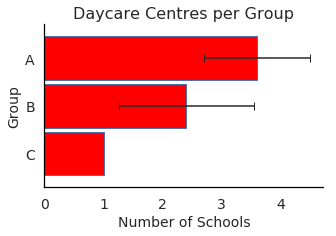

In [90]:
# Summarize number of schools of the 3 clusters
fig = plt.figure(figsize=(5, 3))

ax = stats_daycare['mean'].plot(kind='barh', width=0.92, color=['red'],fontsize=14,ec='b',xerr=stats_daycare['std'],capsize=4)
ax.set_title('Daycare Centres per Group',fontsize = 16)
ax.set_ylabel('Group',fontsize = 14)
ax.set_xlabel('Number of Schools',fontsize = 14)
plt.gca().invert_yaxis()
ax.set_facecolor('w')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

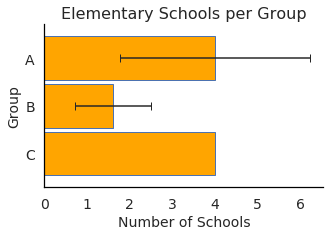

In [91]:
# Summarize number of schools of the 3 clusters
fig = plt.figure(figsize=(5, 3))

ax = stats_school['mean'].plot(kind='barh', width=0.92, color=['orange'],fontsize=14,ec='b',xerr=stats_school['std'],capsize=4)
ax.set_title('Elementary Schools per Group',fontsize = 16)
ax.set_ylabel('Group',fontsize = 14)
ax.set_xlabel('Number of Schools',fontsize = 14)
plt.gca().invert_yaxis()
ax.set_facecolor('w')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

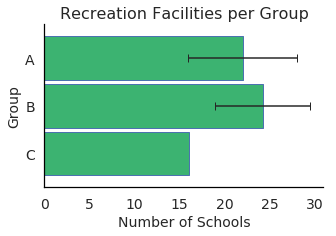

In [92]:
# Summarize number of recreational facilities of the 3 clusters
fig = plt.figure(figsize=(5, 3))

ax = stats_rec['mean'].plot(kind='barh', width=0.92, color=['mediumseagreen'],fontsize=14,ec='b',xerr=stats_rec['std'],capsize=4)
ax.set_title('Recreation Facilities per Group',fontsize = 16)
ax.set_ylabel('Group',fontsize = 14)
ax.set_xlabel('Number of Schools',fontsize = 14)
plt.gca().invert_yaxis()
ax.set_facecolor('w')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#### Most neighbourhoods have at least one Martial Arts Dojo within biking distance (~10 min), except for Lakeview neighbourhood. Lakeview was removed, so 11 neighbourhoods remain.

In [98]:
# Create summary map_global view
map_goldenhorseshoe_7 = folium.Map(width=800,height=900,location=[43.4187, -79.7900], zoom_start=11,tiles='Stamen Toner')

# Add recreation facility markers:  
for lat, lng, venue, neighborhood in zip(top11_outdoors['Venue Latitude'], top11_outdoors['Venue Longitude'], top11_outdoors['Venue Category'], top11_outdoors['Neighborhood']):
    label = '{}, {}'.format(venue, neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng],radius=2,popup=label,color='seagreen',
        fill=True,fill_opacity=0.7,parse_html=False).add_to(map_goldenhorseshoe_7)
    
# Add daycare centre labels
for lat, lng, venue, neighborhood in zip(top11_daycare['Venue Latitude'], top11_daycare['Venue Longitude'], top11_daycare['Venue Category'], top11_daycare['Neighborhood']):
    label = '{}, {}'.format(venue, neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng],radius=2,popup=label,color='red',
        fill=True,fill_opacity=0.7,parse_html=False).add_to(map_goldenhorseshoe_7)  
    
# Add elementary school markers:   
for lat, lng, venue, neighborhood in zip(top11_school['Venue Latitude'], top11_school['Venue Longitude'], top11_school['Venue Category'], top11_school['Neighborhood']):
    label = '{}, {}'.format(venue, neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng],radius=2,popup=label,color='orange',
        fill=True,fill_opacity=0.7,parse_html=False).add_to(map_goldenhorseshoe_7)   
    
# Add martial arts dojo markers:
for lat, lng, venue, neighborhood in zip(Dojo_df['Venue Latitude'], Dojo_df['Venue Longitude'], Dojo_df['Venue Category'], Dojo_df['Neighborhood']):
    label = '{}, {}'.format(venue, neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng],radius=2,popup=label,color='limegreen',
        fill=True,fill_opacity=0.7,parse_html=False).add_to(map_goldenhorseshoe_7)  

# add markers to the map, for KMeans Clustered neighbourhoods
rainbow = ['blue','blue']
markers_colors = []
for lat, lon, poi, cluster in zip(master_narrow['Latitude'], master_narrow['Longitude'], master_narrow['Neighbourhood'], master_narrow['KMeans Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker([lat, lon],radius=5,popup=label,color=rainbow[cluster-1],fill=True,fill_color=rainbow[cluster-1],fill_opacity=1).add_to(map_goldenhorseshoe_7)
 
    
map_goldenhorseshoe_7

In [99]:
# Create summary map_global view
map_goldenhorseshoe_7 = folium.Map(width=1100,height=900,location=[43.4187, -79.7900], zoom_start=12,tiles='Stamen Toner')

# Add recreation facility markers:  
for lat, lng, venue, neighborhood in zip(top11_outdoors['Venue Latitude'], top11_outdoors['Venue Longitude'], top11_outdoors['Venue Category'], top11_outdoors['Neighborhood']):
    label = '{}, {}'.format(venue, neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng],radius=6,popup=label,color='seagreen',
        fill=True,fill_opacity=0.7,parse_html=False).add_to(map_goldenhorseshoe_7)
    
# Add daycare centre labels
for lat, lng, venue, neighborhood in zip(top11_daycare['Venue Latitude'], top11_daycare['Venue Longitude'], top11_daycare['Venue Category'], top11_daycare['Neighborhood']):
    label = '{}, {}'.format(venue, neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng],radius=6,popup=label,color='red',
        fill=True,fill_opacity=0.7,parse_html=False).add_to(map_goldenhorseshoe_7)  
    
# Add elementary school markers:   
for lat, lng, venue, neighborhood in zip(top11_school['Venue Latitude'], top11_school['Venue Longitude'], top11_school['Venue Category'], top11_school['Neighborhood']):
    label = '{}, {}'.format(venue, neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng],radius=6,popup=label,color='orange',
        fill=True,fill_opacity=0.7,parse_html=False).add_to(map_goldenhorseshoe_7)   
    
# Add martial arts dojo markers:
for lat, lng, venue, neighborhood in zip(Dojo_df['Venue Latitude'], Dojo_df['Venue Longitude'], Dojo_df['Venue Category'], Dojo_df['Neighborhood']):
    label = '{}, {}'.format(venue, neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng],radius=6,popup=label,color='limegreen',
        fill=True,fill_opacity=0.7,parse_html=False).add_to(map_goldenhorseshoe_7)  

# add markers to the map, for KMeans Clustered neighbourhoods
rainbow = ['blue','blue']
markers_colors = []
for lat, lon, poi, cluster in zip(master_narrow['Latitude'], master_narrow['Longitude'], master_narrow['Neighbourhood'], master_narrow['KMeans Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker([lat, lon],radius=10,popup=label,color=rainbow[cluster-1],fill=True,fill_color=rainbow[cluster-1],fill_opacity=1).add_to(map_goldenhorseshoe_7)
 
    
map_goldenhorseshoe_7


---

### Summary of Results: Three Neighbourhood Groups

#### Group A: Mississauga-on-the-lake, east of the Credit River
The postal codes for this region are: L4Y, L5A, L5B, L5C, L5G
The neighbourhoods in this region are: Applewood, Dixie Creditview, Mississauga Valley, East Cooksville,  
  Fairview, City Centre, Mavis, Erindale, Southwest Lakeview, Mineola, East Port Credit

#### Group B: Burlington-on-the-lake, Oakville centre
The postal codes for this region are: L6K, L7L, L7M, L7N, L7R, L7S   
The neighbourhoods in this region are: Central Oakville, Elizabeth Gardens, Longmoor, Pinedale,  
  Shoreacres, Alton Village, Headon Forest, Palmer, Tansley Woods, Roseland, Dynes, Central, Plains, Maple

#### Group C: Dundas (west Hamilton)
The postal codes for this region is L9H  
The neighbourhood of this region is Dundas

---

## 5. Discussion

Starting from 35 distinct macro-neighbourhoods, there remain 11 that meet the criteria of a young couple looking to move to the southwest shore of Lake Ontario. These 11 neighbourhoods are also clustered together and form 3 groups: 
  * Mississauga, near the lake (5 postal code regions)
  * Burlington, near the lake, and one neighbourhood of Oakville (6 postal code regions)
  * Dundas city, west Hamilton (one postal code)
   
These three different clusters vary slightly in the abundance of the key elements that the couple are looking for: (1) local daycare, (2) local elementary school, (3) high quantity and quality of recreational activities, and (4) an additional item; a local Martial Arts Dojo. Since 11 neighbourhoods meet the criteria, the couple can now focus on the particular recreational activities they prefer in the smaller communities within each of these neighbourhoods. This should save time and resources in approaching neighbourhood research as well as time spent at open houses and community events of neighbourhoods that are overall not a good fit for this particular couple.

Having three different large clusters of neighbourhoods is helpful, as it affords the couple more flexibility in finding a neighbourhood which also optimizes their working commute. This is largely the reason that the couple chose to not yet further reduce the number of desirable neighbourhoods.

Other factors may play a role in the search of the ideal neighbourhood, such as housing costs, which was not factored into the present analysis. Housing costs can vary within communities due to the proximity to desirable features, waterfront and parks, or undesirable locations such as waste management facilities and high-traffic roads. Therefore, while this analysis provides a more focussed approach for starting to describe ideal neighbourhoods, further investigation is warranted to understand the regional differences within communities of each desirable neighbourhood.

This analysis was conducted using data analytics provided by the Foursquare API. It is possible that daycare centres that are small or do not have an online presence could be missing from this analysis, which would exclude an entire neighbourhood. Foursquare data is also user generated, and so it is possible that the presence and absence of daycares centres and other similar facilities is different today during a global pandemic where multiple businesses are still currently closed. The couple will run this data analysis again later when more businesses open up, to see if the results change.

---

## 6. Conclusion

In this present study, we used a data science approach to explore and select neighbourhoods based on the preferences of a young couple looking to buy their first home. We collected existing data using a postal code database as well as the Foursquare API. Based on these data and the ensuing data analytics, we were able to provide valuable information which would assist the couple in narrowing their search for a desirable neighbourhood.

We recognize this study is based on limited data and is also uniquely impacted by a global pandemic, which affects user generated data. However, this study provides a good initial starting point for considering the qualities of a desirable neighbourhood for a young couple who appreciate local amenities and outdoor activities. This analysis can be adapted to other cities around the globe by adapting the code presented above, and can be used for all sorts of factors that people require when considering a neighbourhood that they would like to live in.
